## Exploratory Data Analysis of The Transformed Loan Payments Table

In [1]:
# Import necessary modules

from data_frame_info import DataFrameInfo

from plotter import Plotter

from db_connector import open_latest_table


In [2]:
# Call the open_latest_table function and retrieve the final transformed loan payments dataframe.
loan_payments = open_latest_table()

In [3]:
# Call the DataFrameInfo class
table_info = DataFrameInfo(loan_payments)

# Calculate percentage loans recovered against total loans and total loan investments.
loan_recoveries = table_info.recovered_loans()

The proportion of loan investments recovered is 99.99%.
The proportion of whole loans recovered is 99.99%.
6 months of customer instalments will result in 18.14% loan recovery.


### Plot the percentage loan recoveries.

<BarContainer object of 3 artists>

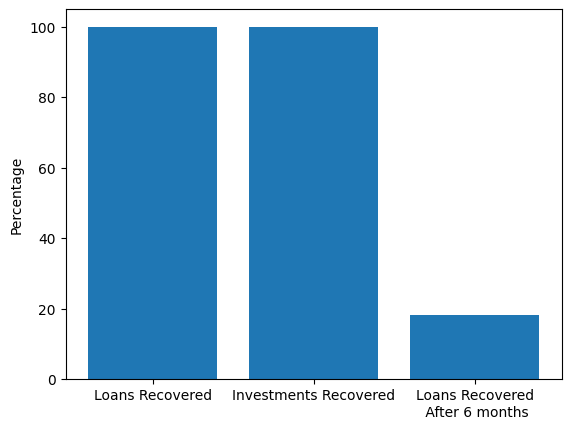

In [4]:
# Call the Plotter class
plot_data = Plotter(loan_payments)

# Plot a bar chart of percentage loan recoveries using loan_recoveries.
plot_data.bar_chart(loan_recoveries)

### Calculating loss.

In [25]:
# Call the get_unique_values method to find unique values in the 'loan_status column.
loan_status = table_info.get_unique_values('loan_status')
display(loan_status)

# Calculate the percentage loss to the company as per 'Charged Off' loans.
total_loans = (loan_status.sum())
charged_off = loan_status['Charged Off']
percentage_loss = (charged_off / total_loans * 100).round(2)
print(f'The number of charged off loans are {charged_off}, which equates to a {percentage_loss}% loss for the company.')

# Isolate rows with 'charged_off' loans.
charged_off_loans = loan_payments.loc[loan_payments['loan_status'] == 'Charged Off']

# Calculate amount paid off towards charged off loans.
charged_off_payments = (charged_off_loans['total_payment'].sum()).round(2)
print(f'A total of {charged_off_payments} was paid towards charged off loans')

loan_status
Fully Paid                                             27033
Current                                                19267
Charged Off                                             5503
Does not meet the credit policy. Status:Fully Paid       984
Late (31-120 days)                                       580
Does not meet the credit policy. Status:Charged Off      361
In Grace Period                                          265
Late (16-30 days)                                        106
Default                                                   52
Name: count, dtype: int64

The number of charged off loans are 5503, which equates to a 10.16% loss for the company.
A total of 219672.33 was paid towards charged off loans
